**Explore and Understand the Dataset:**

In [6]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Load the California Housing dataset
california_housing = fetch_california_housing()
data = pd.DataFrame(data=california_housing.data, columns=california_housing.feature_names)
target = pd.DataFrame(data=california_housing.target, columns=['target'])



In [7]:
# Display basic information about the dataset
print(data.info())
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB
None
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.4

**Handle Missing Values or Outliers:**

In [8]:
# Check for missing values
print(data.isnull().sum())


MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64


In [9]:
#Handle outliers using Z-score
from scipy import stats
z_scores = stats.zscore(data)
data_no_outliers = data[(z_scores < 3).all(axis=1)]


In [11]:
# Split the dataset into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

**Linear Regression:**

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create and train the Linear Regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)


LinearRegression()

In [13]:
# Make predictions on the testing set
y_pred_linear = linear_reg_model.predict(X_test)


In [14]:
# Evaluate the model's performance
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print(f"Linear Regression - Mean Squared Error: {mse_linear}")
print(f"Linear Regression - R2 Score: {r2_linear}")

Linear Regression - Mean Squared Error: 0.555891598695244
Linear Regression - R2 Score: 0.5757877060324511


**Artificial Neural Network (ANN):**

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [16]:
# Create a simple ANN model
ann_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(1)
])


In [19]:
# Import the compat module
from tensorflow.compat.v1 import train

# Compile the model using tf.compat.v1.train.Optimizer
ann_model.compile(optimizer=train.AdamOptimizer(), loss='mean_squared_error')

In [20]:
# Train the ANN on the training set
ann_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=2)


Epoch 1/50


516/516 - 1s - loss: 5.2002 - 803ms/epoch - 2ms/step
Epoch 2/50
516/516 - 1s - loss: 1.5342 - 523ms/epoch - 1ms/step
Epoch 3/50
516/516 - 1s - loss: 3.2792 - 636ms/epoch - 1ms/step
Epoch 4/50
516/516 - 1s - loss: 2.5711 - 622ms/epoch - 1ms/step
Epoch 5/50
516/516 - 1s - loss: 1.5525 - 585ms/epoch - 1ms/step
Epoch 6/50
516/516 - 1s - loss: 1.9154 - 788ms/epoch - 2ms/step
Epoch 7/50
516/516 - 1s - loss: 5.2042 - 690ms/epoch - 1ms/step
Epoch 8/50
516/516 - 1s - loss: 1.6209 - 580ms/epoch - 1ms/step
Epoch 9/50
516/516 - 1s - loss: 6.5508 - 629ms/epoch - 1ms/step
Epoch 10/50
516/516 - 1s - loss: 0.7772 - 570ms/epoch - 1ms/step
Epoch 11/50
516/516 - 1s - loss: 1.3525 - 565ms/epoch - 1ms/step
Epoch 12/50
516/516 - 1s - loss: 2.0315 - 562ms/epoch - 1ms/step
Epoch 13/50
516/516 - 1s - loss: 1.5407 - 568ms/epoch - 1ms/step
Epoch 14/50
516/516 - 1s - loss: 3.4586 - 560ms/epoch - 1ms/step
Epoch 15/50
516/516 - 1s - loss: 6.0471 - 509ms/epoch - 987us/step
Epoch 16/50
516/516 - 1s - loss: 11.8923 - 

In [21]:
# Make predictions on the testing set
y_pred_ann = ann_model.predict(X_test)


129/129 [==============================] - 0s 1ms/step


In [22]:
# Evaluate the model's performance
mse_ann = mean_squared_error(y_test, y_pred_ann)
r2_ann = r2_score(y_test, y_pred_ann)
print(f"ANN - Mean Squared Error: {mse_ann}")
print(f"ANN - R2 Score: {r2_ann}")

ANN - Mean Squared Error: 0.7608581379534369
ANN - R2 Score: 0.4193735310217295


**Comparison and Analysis:**

In [23]:
# Compare the performance metrics of the Linear Regression and ANN models
print("Linear Regression Metrics:")
print(f"Mean Squared Error: {mse_linear}")
print(f"R2 Score: {r2_linear}")

print("\nANN Metrics:")
print(f"Mean Squared Error: {mse_ann}")
print(f"R2 Score: {r2_ann}")

Linear Regression Metrics:
Mean Squared Error: 0.555891598695244
R2 Score: 0.5757877060324511

ANN Metrics:
Mean Squared Error: 0.7608581379534369
R2 Score: 0.4193735310217295


**Visualization**

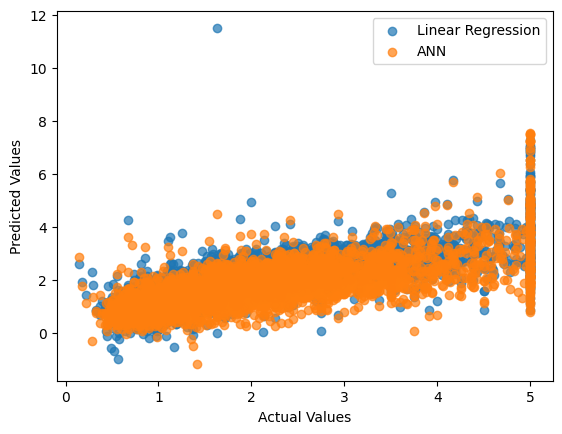

In [24]:
import matplotlib.pyplot as plt

# Create visualizations to compare the predicted values of the two models with the actual values
plt.scatter(y_test, y_pred_linear, label='Linear Regression', alpha=0.7)
plt.scatter(y_test, y_pred_ann, label='ANN', alpha=0.7)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()